# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных по манге:

https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist?resource=download&select=manga.csv

Датасет состоит из пяти файлов:

* manga.csv - информация о манге
* authors.xlsx - авторы манги
* genres.xlsx - жанры манги
* themes.xlsx - темы манги
* demographics.xlsx - целевая аудитория манги

Каждый из трех последних файлов содержит две колонки:

* manga_id - уникальный идентификатор манги, которой соответствует жанр/тема/аудитория
* genre_name/theme_name/demographic_name - уникальное название соответствующего объекта

Второй файл сожержит следующие колонки:

* manga_id - уникальный идентификатор манги, которой соответсвует автор
* author/id - уникальный идентификатор автора
* author/first_name	- имя автора
* author/last_name - фамилия автора
* author/role - роль автора (художник/сюжет и т.д.)

Первый файл содержит большое количество колонок. Наиболее интересные из них:

* manga_id - уникальный идентификатор манги
* title - тайтл манги
* type - тип издания (манга/ранобэ/...)
* score - средняя оценка на сайте MyAnimeList
* scored_by - количество пользователей, оценивших мангу на сайте MyAnimeList
* status - статус (выходит/перерыв/завершено/...)
* start_date - дата выхода манги
* end_date - дата завершения манги
* members - количество пользователей, добавивших мангу в свой список (запланировано/прочиатано/...)
* favorites - количество пользователей, добавивших мангу в избранное
* sfw - возрастной рейтинг 18+ (18+ - 0, иначе - 1)

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
# import matplotlib as mp
import matplotlib.pyplot as plt
# import math
import seaborn as sns
# import scipy
# import matplotlib.dates as mdates
from dython.nominal import associations
import circlify

# Загрузка данных

In [2]:
# загрузка данных
manga = pd.read_csv('manga.csv', low_memory=False)    # манга
authors = pd.read_excel('authors.xlsx')               # авторы манги
genres = pd.read_excel('genres.xlsx')                 # жанры манги
themes = pd.read_excel('themes.xlsx')                 # темы манги
demographics = pd.read_excel('demographics.xlsx')     # целевая аудитория манги

## 2) Основные характеристики датасета

### Авторы


In [3]:
authors.head()

,manga_id,author/id,author/first_name,author/last_name,author/role
0,2,1868,Kentarou,Miura,Story & Art
1,2,49592,NaN,Studio Gaga,Art
2,13,1881,Eiichiro,Oda,Story & Art
3,25,1874,Hiromu,Arakawa,Story & Art
4,1706,2619,Hirohiko,Araki,Story & Art


In [4]:
authors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84549 entries, 0 to 84548
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manga_id           84549 non-null  int64 
 1   author/id          84549 non-null  int64 
 2   author/first_name  65589 non-null  object
 3   author/last_name   84541 non-null  object
 4   author/role        84549 non-null  object
dtypes: int64(2), object(3)
memory usage: 16.1 MB


In [5]:
authors.isna().sum()

manga_id                 0
author/id                0
author/first_name    18960
author/last_name         8
author/role              0
dtype: int64

In [6]:
authors.describe(include=['int', 'object'])

,manga_id,author/id,author/first_name,author/last_name,author/role
count,84549.000000,84549.000000,65589,84541,84549
unique,NaN,NaN,6585,12813,3
top,NaN,NaN,Yuu,Takahashi,Story & Art
freq,NaN,NaN,795,391,46982
mean,74891.379460,22121.239045,NaN,NaN,NaN
std,43481.923905,17468.573033,NaN,NaN,NaN
min,1.000000,14.000000,NaN,NaN,NaN
25%,32737.000000,5194.000000,NaN,NaN,NaN
50%,83593.000000,18247.000000,NaN,NaN,NaN
75%,108026.000000,36915.000000,NaN,NaN,NaN


In [7]:
authors['manga_id'] = authors['manga_id'].astype('int32')
authors['author/id'] = authors['author/id'].astype('int32')
authors['author/role'] = authors['author/role'].astype('string')
authors['author/first_name'] = authors['author/first_name'].astype('string')
authors['author/last_name'] = authors['author/last_name'].astype('string')
authors['author/first_name'] = authors['author/first_name'].fillna('')
authors['author/last_name'] = authors['author/last_name'].fillna('')
authors['author_name'] = authors['author/first_name'] + ' ' + authors['author/last_name']
authors.drop(['author/first_name', 'author/last_name'], axis=1, inplace=True)

In [8]:
authors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84549 entries, 0 to 84548
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   manga_id     84549 non-null  int32 
 1   author/id    84549 non-null  int32 
 2   author/role  84549 non-null  string
 3   author_name  84549 non-null  string
dtypes: int32(2), string(2)
memory usage: 11.4 MB


In [9]:
authors.isna().sum()

manga_id       0
author/id      0
author/role    0
author_name    0
dtype: int64

In [10]:
authors.duplicated().sum()

0

### Жанры

In [11]:
genres.head()

,manga_id,genre_name
0,2,Action
1,2,Adventure
2,2,Award Winning
3,2,Drama
4,2,Fantasy


In [12]:
genres.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127425 entries, 0 to 127424
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   manga_id    127425 non-null  int64 
 1   genre_name  127425 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.8 MB


In [13]:
genres.describe(include=['int', 'object'])

,manga_id,genre_name
count,127425.000000,127425
unique,NaN,21
top,NaN,Romance
freq,NaN,17622
mean,75934.159513,NaN
std,48935.993529,NaN
min,1.000000,NaN
25%,23804.000000,NaN
50%,86139.000000,NaN
75%,118926.000000,NaN


In [14]:
genres['genre_name'] = genres['genre_name'].astype('string')
genres['manga_id'] = genres['manga_id'].astype('int32')

In [15]:
genres.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127425 entries, 0 to 127424
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   manga_id    127425 non-null  int32 
 1   genre_name  127425 non-null  string
dtypes: int32(1), string(1)
memory usage: 8.3 MB


In [16]:
genres.isna().sum()

manga_id      0
genre_name    0
dtype: int64

In [17]:
genres.duplicated().sum()

0

### Темы

In [18]:
themes.head()

,manga_id,theme_name
0,2,Gore
1,2,Military
2,2,Mythology
3,2,Psychological
4,25,Military


In [19]:
themes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29798 entries, 0 to 29797
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   manga_id    29798 non-null  int64 
 1   theme_name  29798 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1 MB


In [20]:
themes.describe(include=['int', 'object'])

,manga_id,theme_name
count,29798.000000,29798
unique,NaN,52
top,NaN,School
freq,NaN,10661
mean,77003.330828,NaN
std,48789.941595,NaN
min,1.000000,NaN
25%,25215.000000,NaN
50%,85226.000000,NaN
75%,118871.000000,NaN


In [21]:
themes['theme_name'] = themes['theme_name'].astype('string')
themes['manga_id'] = themes['manga_id'].astype('int32')

In [22]:
themes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29798 entries, 0 to 29797
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   manga_id    29798 non-null  int32 
 1   theme_name  29798 non-null  string
dtypes: int32(1), string(1)
memory usage: 2.0 MB


In [23]:
themes.isna().sum()

manga_id      0
theme_name    0
dtype: int64

In [24]:
themes.duplicated().sum()

0

### Целевая аудитория

In [25]:
demographics.head()

,manga_id,demographic_name
0,2,Seinen
1,13,Shounen
2,25,Shounen
3,1706,Seinen
4,1706,Shounen


In [26]:
demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27060 entries, 0 to 27059
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   manga_id          27060 non-null  int64 
 1   demographic_name  27060 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8 MB


In [27]:
demographics.describe(include=['int', 'object'])

,manga_id,demographic_name
count,27060.000000,27060
unique,NaN,5
top,NaN,Shoujo
freq,NaN,8283
mean,67659.387103,NaN
std,48874.705899,NaN
min,1.000000,NaN
25%,18442.500000,NaN
50%,71304.000000,NaN
75%,110142.250000,NaN


In [28]:
demographics['demographic_name'] = demographics['demographic_name'].astype('string')
demographics['manga_id'] = demographics['manga_id'].astype('int32')

In [29]:
demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27060 entries, 0 to 27059
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   manga_id          27060 non-null  int32 
 1   demographic_name  27060 non-null  string
dtypes: int32(1), string(1)
memory usage: 1.7 MB


In [30]:
demographics.isna().sum()

manga_id            0
demographic_name    0
dtype: int64

In [31]:
demographics.duplicated().sum()

0

### Манга

In [32]:
manga.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,...,"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,...,"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,...,"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,...,"[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,...,"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True


In [33]:
manga.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67273 entries, 0 to 67272
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           67273 non-null  int64  
 1   title              67273 non-null  object 
 2   type               67273 non-null  object 
 3   score              21910 non-null  float64
 4   scored_by          67273 non-null  int64  
 5   status             67273 non-null  object 
 6   volumes            50494 non-null  float64
 7   chapters           47095 non-null  float64
 8   start_date         62949 non-null  object 
 9   end_date           51721 non-null  object 
 10  members            67273 non-null  int64  
 11  favorites          67273 non-null  int64  
 12  sfw                67273 non-null  bool   
 13  approved           67273 non-null  bool   
 14  created_at_before  67273 non-null  object 
 15  updated_at         58991 non-null  object 
 16  real_start_date    629

In [34]:
manga_columns_to_drop = [
    'jikan',
    'approved',
    'created_at_before',
    'updated_at',
    'real_start_date',
    'real_end_date',
    'genres',
    'themes',
    'demographics',
    'authors',
    'serializations',
    'synopsis',
    'background',
    'main_picture',
    'url',
    'volumes',
    'chapters',
    'title_english',
    'title_japanese',
    'title_synonyms',
]
manga.drop(manga_columns_to_drop, axis=1, inplace=True)

In [35]:
manga.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67273 entries, 0 to 67272
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   manga_id    67273 non-null  int64  
 1   title       67273 non-null  object 
 2   type        67273 non-null  object 
 3   score       21910 non-null  float64
 4   scored_by   67273 non-null  int64  
 5   status      67273 non-null  object 
 6   start_date  62949 non-null  object 
 7   end_date    51721 non-null  object 
 8   members     67273 non-null  int64  
 9   favorites   67273 non-null  int64  
 10  sfw         67273 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 24.2 MB


In [36]:
manga.isna().sum()

manga_id          0
title             0
type              0
score         45363
scored_by         0
status            0
start_date     4324
end_date      15552
members           0
favorites         0
sfw               0
dtype: int64

In [37]:
manga.describe(include=['int', 'object', 'float', 'bool'])

,manga_id,title,type,score,scored_by,status,start_date,end_date,members,favorites,sfw
count,67273.000000,67273,67273,21910.000000,67273.000000,67273,62949,51721,67273.000000,67273.000000,67273
unique,NaN,63987,7,NaN,NaN,5,9292,8508,NaN,NaN,2
top,NaN,40 x 40 Chikuwa Kaigi,manga,NaN,NaN,finished,2008-01-01,2008-01-01,NaN,NaN,True
freq,NaN,10,45255,NaN,NaN,57383,611,417,NaN,NaN,46600
mean,77959.681477,NaN,NaN,6.967913,582.226763,NaN,NaN,NaN,1464.975042,47.583399,NaN
std,47358.181042,NaN,NaN,0.515890,4775.525577,NaN,NaN,NaN,9613.747178,924.716631,NaN
min,1.000000,NaN,NaN,2.450000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,28581.000000,NaN,NaN,6.640000,4.000000,NaN,NaN,NaN,40.000000,0.000000,NaN
50%,87804.000000,NaN,NaN,6.940000,25.000000,NaN,NaN,NaN,125.000000,0.000000,NaN
75%,118104.000000,NaN,NaN,7.260000,195.000000,NaN,NaN,NaN,588.000000,2.000000,NaN


In [38]:
manga['score'] = manga['score'].fillna(0)
manga['start_date'] = manga['start_date'].fillna(pd.Timestamp.min)
manga['end_date'] = manga['end_date'].fillna(pd.Timestamp.min)

In [39]:
manga['manga_id'] = manga['manga_id'].astype('int32')
manga['title'] = manga['title'].astype('string')
manga['type'] = manga['type'].astype('string')
manga['score'] = manga['score'].astype('float')
manga['scored_by'] = manga['scored_by'].astype('int32')
manga['status'] = manga['status'].astype('string')
manga['start_date'] = manga['start_date'].astype('datetime64[ns]')
manga['end_date'] = manga['end_date'].astype('datetime64[ns]')
manga['members'] = manga['members'].astype('int32')
manga['favorites'] = manga['favorites'].astype('int32')
manga['sfw'] = manga['sfw'].astype('bool')

In [40]:
manga.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67273 entries, 0 to 67272
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   manga_id    67273 non-null  int32         
 1   title       67273 non-null  string        
 2   type        67273 non-null  string        
 3   score       67273 non-null  float64       
 4   scored_by   67273 non-null  int32         
 5   status      67273 non-null  string        
 6   start_date  67273 non-null  datetime64[ns]
 7   end_date    67273 non-null  datetime64[ns]
 8   members     67273 non-null  int32         
 9   favorites   67273 non-null  int32         
 10  sfw         67273 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int32(4), string(3)
memory usage: 16.3 MB


In [41]:
manga['title'].duplicated().sum()

3286

In [42]:
manga['title'].value_counts()

40 x 40 Chikuwa Kaigi      10
Fate/Requiem               10
Solo Leveling              10
Hatsukoi                   10
Hold Me Tight               8
                           ..
Acacia no Michi             1
Lion ni Amagami             1
splatoon squid manga        1
splatoon 4-panel comics     1
Utsukushii Kare             1
Name: title, Length: 63987, dtype: Int64

In [43]:
manga.drop_duplicates('title', keep='first', inplace=True)

In [44]:
manga['title'].duplicated().sum()

0

In [45]:
manga.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63987 entries, 0 to 67272
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   manga_id    63987 non-null  int32         
 1   title       63987 non-null  string        
 2   type        63987 non-null  string        
 3   score       63987 non-null  float64       
 4   scored_by   63987 non-null  int32         
 5   status      63987 non-null  string        
 6   start_date  63987 non-null  datetime64[ns]
 7   end_date    63987 non-null  datetime64[ns]
 8   members     63987 non-null  int32         
 9   favorites   63987 non-null  int32         
 10  sfw         63987 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int32(4), string(3)
memory usage: 16.0 MB


## 3) Визуальное исследование датасета

### Плотность распределения оценок по типам изданий

<AxesSubplot: xlabel='score', ylabel='Density'>

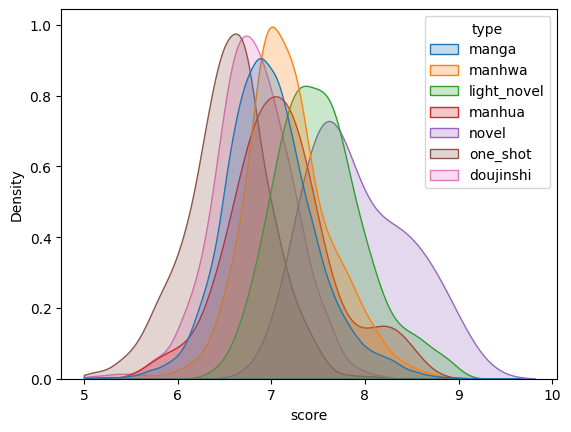

In [46]:
sns.kdeplot(data=manga.loc[manga['score'] > 0], x="score", fill=True, hue="type", common_norm=False, multiple="layer", clip=(5, 10))

### Популярность тем у авторов

In [47]:
safe_manga = manga.loc[manga['sfw'] == True]

In [48]:
manga_themes = pd.merge(safe_manga, themes, left_on="manga_id", right_on="manga_id", how="inner", validate="m:m")

In [49]:
manga_themes_gr = manga_themes.groupby(["theme_name"]).count()['manga_id'].sort_values(ascending=False)

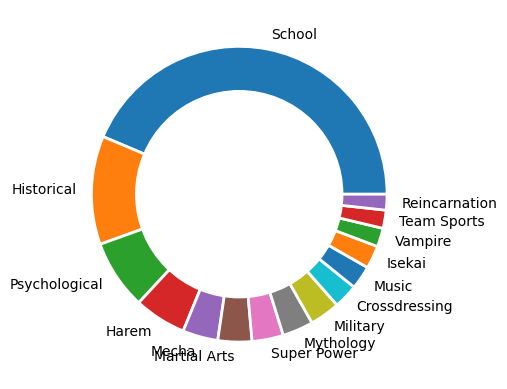

In [50]:
plt.pie(manga_themes_gr[:15].values, labels=manga_themes_gr[:15].index, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Популярность жанров у читателей

In [51]:
manga_genres = pd.merge(safe_manga, genres, left_on="manga_id", right_on="manga_id", how="inner", validate="m:m")

In [52]:
manga_genres_gr = manga_genres.groupby(['genre_name'])['members'].sum().sort_values(ascending=False)

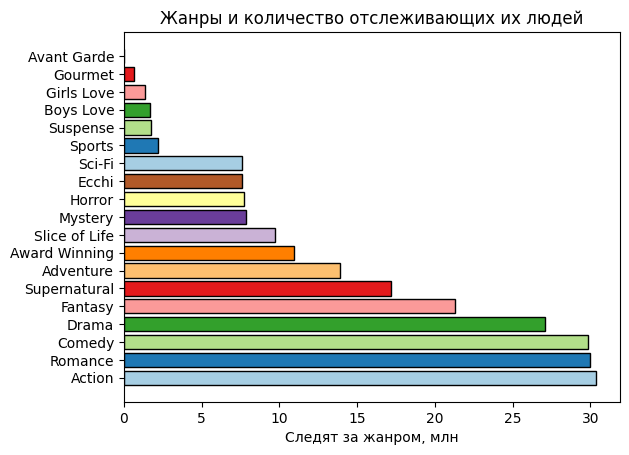

In [53]:
src = manga_genres_gr
height = src.values
bars = src.index
y_pos = np.arange(len(bars))
plt.barh(y_pos, height/1000000, color=plt.get_cmap('Paired').colors, edgecolor='k')
plt.yticks(y_pos, bars)
plt.xlabel('Следят за жанром, млн')
plt.title('Жанры и количество отслеживающих их людей');
plt.show()

### Зависимость числа людей, добавивших мангу этого жанра в избранное, от числа людей, добавивших мангу этого жанра в свой список

In [54]:
src = manga_genres.loc[manga_genres['score'] > 0].groupby('genre_name').agg(
    sum_members=pd.NamedAgg(column="members", aggfunc="sum"),
    sum_favorites=pd.NamedAgg(column="favorites", aggfunc="sum"),
)

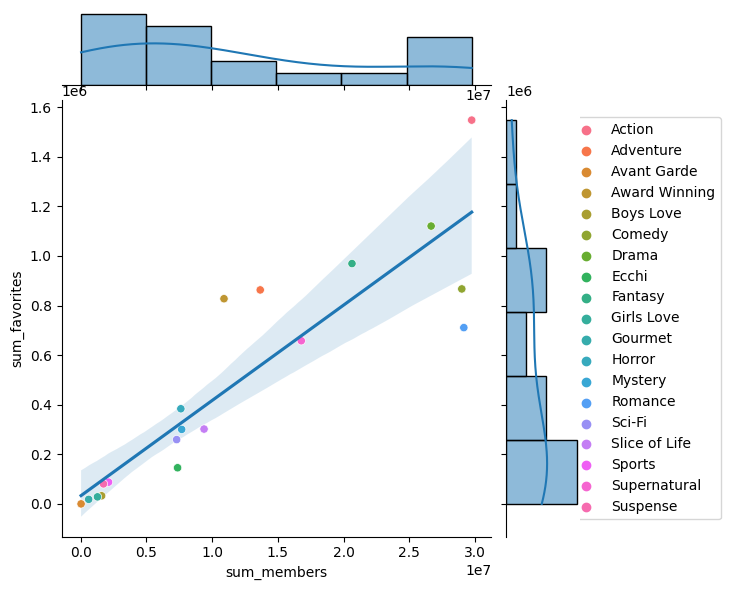

In [55]:
g = sns.jointplot(y="sum_favorites", x="sum_members",
                 data=src, kind="reg", scatter=False)
ax = sns.scatterplot(x="sum_members", y="sum_favorites",
                hue="genre_name", data=src,
                legend="auto", ax=g.ax_joint)
ax.legend(loc='center left', 
                bbox_to_anchor=(1.16, 0.5))
# ax.map_dataframe(sns.lineplot, 'sum_members', 'sum_favorites', color='g')
# plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

### Количество вышедшей манги по годам

In [56]:
manga_start_date = manga.loc[manga['start_date'] > pd.Timestamp.min]

In [57]:
manga_start_date['year'] = manga_start_date['start_date'].dt.year.apply(lambda x : x)

C:\Users\1\AppData\Local\Temp\ipykernel_16500\3428633718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manga_start_date['year'] = manga_start_date['start_date'].dt.year.apply(lambda x : x)


In [58]:
src = pd.DataFrame(manga_start_date.groupby(['year'])['manga_id'].count())

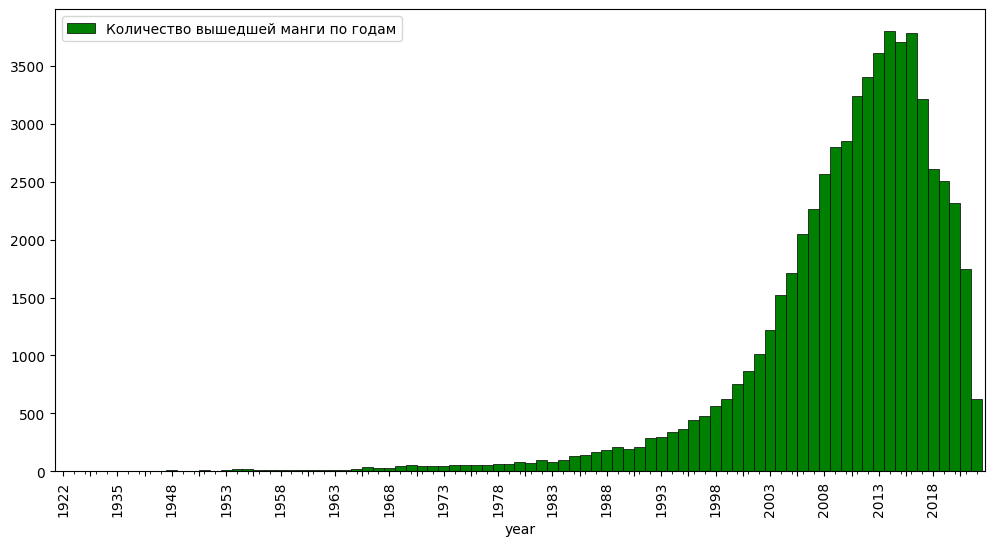

In [59]:
axes = src.plot.bar(y='manga_id', label='Количество вышедшей манги по годам', 
                    width=1, edgecolor='k', linewidth=0.5, color=['green'], figsize=(12, 6))
axes.xaxis.set_major_locator(plt.MaxNLocator(40))
axes.xaxis.set_minor_locator(plt.MaxNLocator(100))

### Популярные жанры по сезонам за последние 5 лет

In [60]:
data = manga.loc[manga['score'] > 0].loc[manga['start_date'].dt.year.apply(lambda x : x) > pd.Timestamp.now().year - 5].loc[manga['sfw']==True]

In [61]:
data_genres = pd.merge(genres.loc[genres['genre_name'] != 'Award Winning'], data, 
                  left_on="manga_id",right_on="manga_id", how="inner",validate="m:m")

In [62]:
def MonthToSeason(x):   
        global season
        if x == 6 or x == 7 or x == 8:
             season = "Лето"
        elif x == 10 or x == 11 or x == 9:
             season = "Осень"
        elif x == 12 or x == 1 or x == 2:
             season = "Зима"
        elif x == 3 or x == 4 or x == 5:
             season = "Весна"
        else:
             season = np.nan 
        return season

data_genres['Season'] = data_genres['start_date'].dt.month.apply(lambda x : MonthToSeason(x))

In [63]:
winter = data_genres.loc[data_genres['Season'] == 'Зима'].groupby(['genre_name'])['favorites'].sum().sort_values(ascending=False)[:3]
spring = data_genres.loc[data_genres['Season'] == 'Весна'].groupby(['genre_name'])['favorites'].sum().sort_values(ascending=False)[:3]
summer = data_genres.loc[data_genres['Season'] == 'Лето'].groupby(['genre_name'])['favorites'].sum().sort_values(ascending=False)[:3]
autumn = data_genres.loc[data_genres['Season'] == 'Осень'].groupby(['genre_name'])['favorites'].sum().sort_values(ascending=False)[:3]

In [64]:
vals = list(winter.values) + list(spring.values) + list(summer.values) + list(autumn.values)
genrs = list(winter.index) + list(spring.index) + list(summer.index) + list(autumn.index)
sesn = ['Зима','Зима', 'Зима', 'Весна', 'Весна', 'Весна', 'Лето', 'Лето', 'Лето', 'Осень', 'Осень', 'Осень']
d = {'Season': sesn, 'genre_name': genrs, 'score': vals}
show = pd.DataFrame(data=d)

D:\JetBrains\PyCharm 2021.2.2\PycharmProjects\oad\LR10\.venv\lib\site-packages\seaborn\categorical.py:3200: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


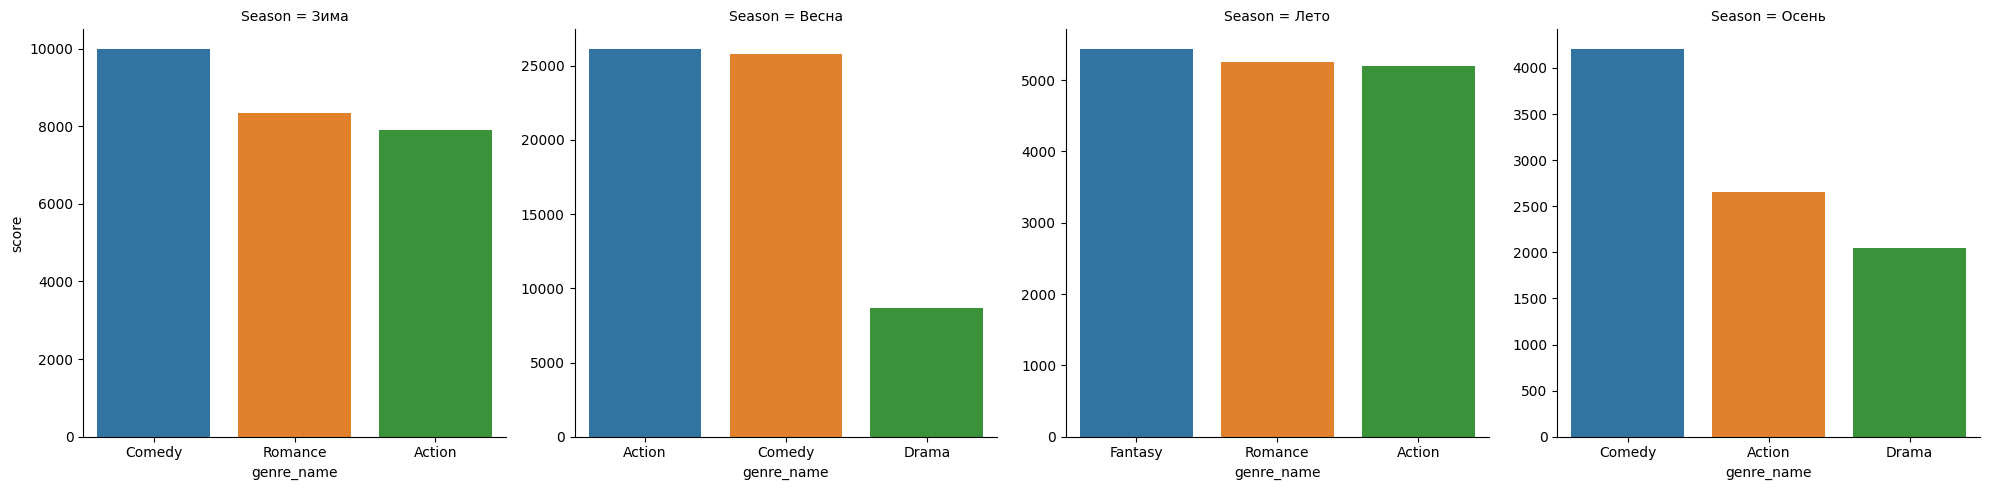

In [65]:
sns.catplot(
    data=show,
    x='genre_name',
    y='score',
    col='Season',
    kind="bar",
    sharex=False,
    sharey=False,
)

### Лучшая манга и ее авторы

In [66]:
best_authors = manga.loc[manga['score'] > 0]
best_authors = pd.merge(authors, best_authors, left_on="manga_id",right_on="manga_id", how="inner",validate="m:m")

In [67]:
best_authors.sort_values(by=['score'], ascending=False, inplace=True)
best_authors.drop_duplicates(subset=['author_name'], inplace=True)

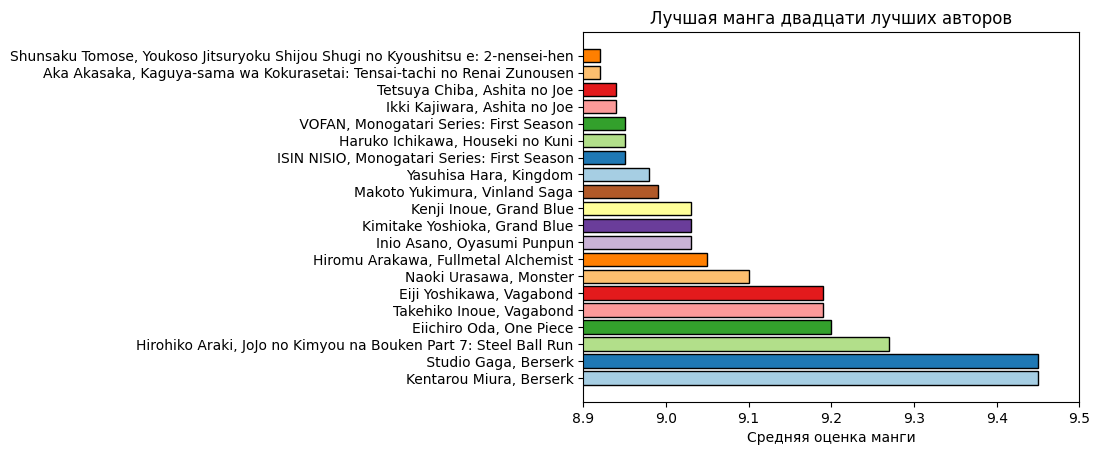

In [68]:
height = best_authors[:20]['score'].values
bars = best_authors[:20]['author_name'].values + ', ' + best_authors[:20]['title'].values
y_pos = np.arange(len(bars))
plt.barh(y_pos, height, color=plt.get_cmap('Paired').colors, edgecolor='k')
plt.yticks(y_pos, bars)
plt.xlim(8.9, 9.5)
plt.xlabel('Средняя оценка манги')
plt.title('Лучшая манга двадцати лучших авторов');
plt.show()

In [117]:
manga.head()

,manga_id,title,type,score,scored_by,status,start_date,end_date,members,favorites,sfw
0,2,Berserk,manga,9.45,268737,currently_publishing,1989-08-25,1677-09-21 00:12:43.145224193,551266,103820,True
1,13,One Piece,manga,9.20,305917,currently_publishing,1997-07-22,1677-09-21 00:12:43.145224193,501291,99526,True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,2001-07-12,2010-09-11 00:00:00.000000000,264571,28519,True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,2004-01-19,2011-04-19 00:00:00.000000000,209123,35456,True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,2007-03-15,2013-11-02 00:00:00.000000000,354176,43168,True


### "Ящик с усами" для оценок топ 10 авторов

In [118]:
bauth = manga.loc[manga['score'] > 0]
bauth = pd.merge(authors, bauth, left_on="manga_id",right_on="manga_id", how="inner",validate="m:m")

In [119]:
bauths = bauth.groupby(['author_name'])['score'].max().sort_values(ascending=False)[:20]

In [120]:
best = list(bauths.index)

In [121]:
bauth.head()

,manga_id,author/id,author/role,author_name,title,type,score,scored_by,status,start_date,end_date,members,favorites,sfw
0,2,1868,Story & Art,Kentarou Miura,Berserk,manga,9.45,268737,currently_publishing,1989-08-25,1677-09-21 00:12:43.145224193,551266,103820,True
1,2,49592,Art,Studio Gaga,Berserk,manga,9.45,268737,currently_publishing,1989-08-25,1677-09-21 00:12:43.145224193,551266,103820,True
2,13,1881,Story & Art,Eiichiro Oda,One Piece,manga,9.20,305917,currently_publishing,1997-07-22,1677-09-21 00:12:43.145224193,501291,99526,True
3,25,1874,Story & Art,Hiromu Arakawa,Fullmetal Alchemist,manga,9.05,143879,finished,2001-07-12,2010-09-11 00:00:00.000000000,264571,28519,True
4,1706,2619,Story & Art,Hirohiko Araki,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,2004-01-19,2011-04-19 00:00:00.000000000,209123,35456,True


In [122]:
filt_manga = bauth.loc[bauth['score'] > 0].loc[bauth['author_name'].isin(best)]

<AxesSubplot: xlabel='score', ylabel='author_name'>

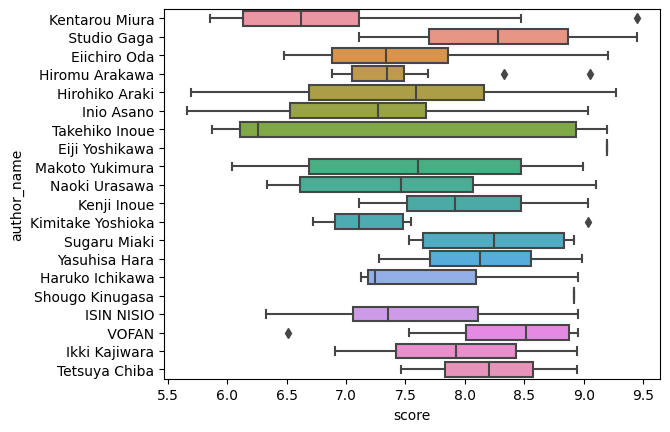

In [123]:
sns.boxplot(x=filt_manga['score'], y=filt_manga['author_name'])

## 4) Информация о корреляции признаков

In [71]:
data = manga.loc[manga['members'] > 0].loc[manga['favorites'] > 0].loc[manga['score'] > 0]
data = data.loc[data['start_date'] > pd.Timestamp.min].loc[data['end_date'] > pd.Timestamp.min]

In [72]:
data = pd.merge(genres, data, left_on="manga_id", right_on="manga_id", how="inner", validate="m:m")
data = pd.merge(authors, data, left_on="manga_id", right_on="manga_id", how="inner", validate="m:m")
data = pd.merge(demographics, data, left_on="manga_id", right_on="manga_id", how="inner", validate="m:m")
data = pd.merge(themes, data, left_on="manga_id", right_on="manga_id", how="inner", validate="m:m")

In [73]:
data = data.drop(['manga_id', 'author/id', 'title'], axis=1)

In [74]:
categorical_columns =[
    'type', 'status', 'sfw', 
    'start_date', 'end_date', 
    'theme_name', 'demographic_name',
    'author/role', 'author_name',
    'genre_name'
]

In [75]:
res_corr = associations(data, nominal_columns=categorical_columns, cmap='RdBu_r',
                        title='Матрица корреляции и зависимости атрибутов',
                        clustering=True, figsize=(18,18), plot=False, compute_only=True)

<AxesSubplot: >

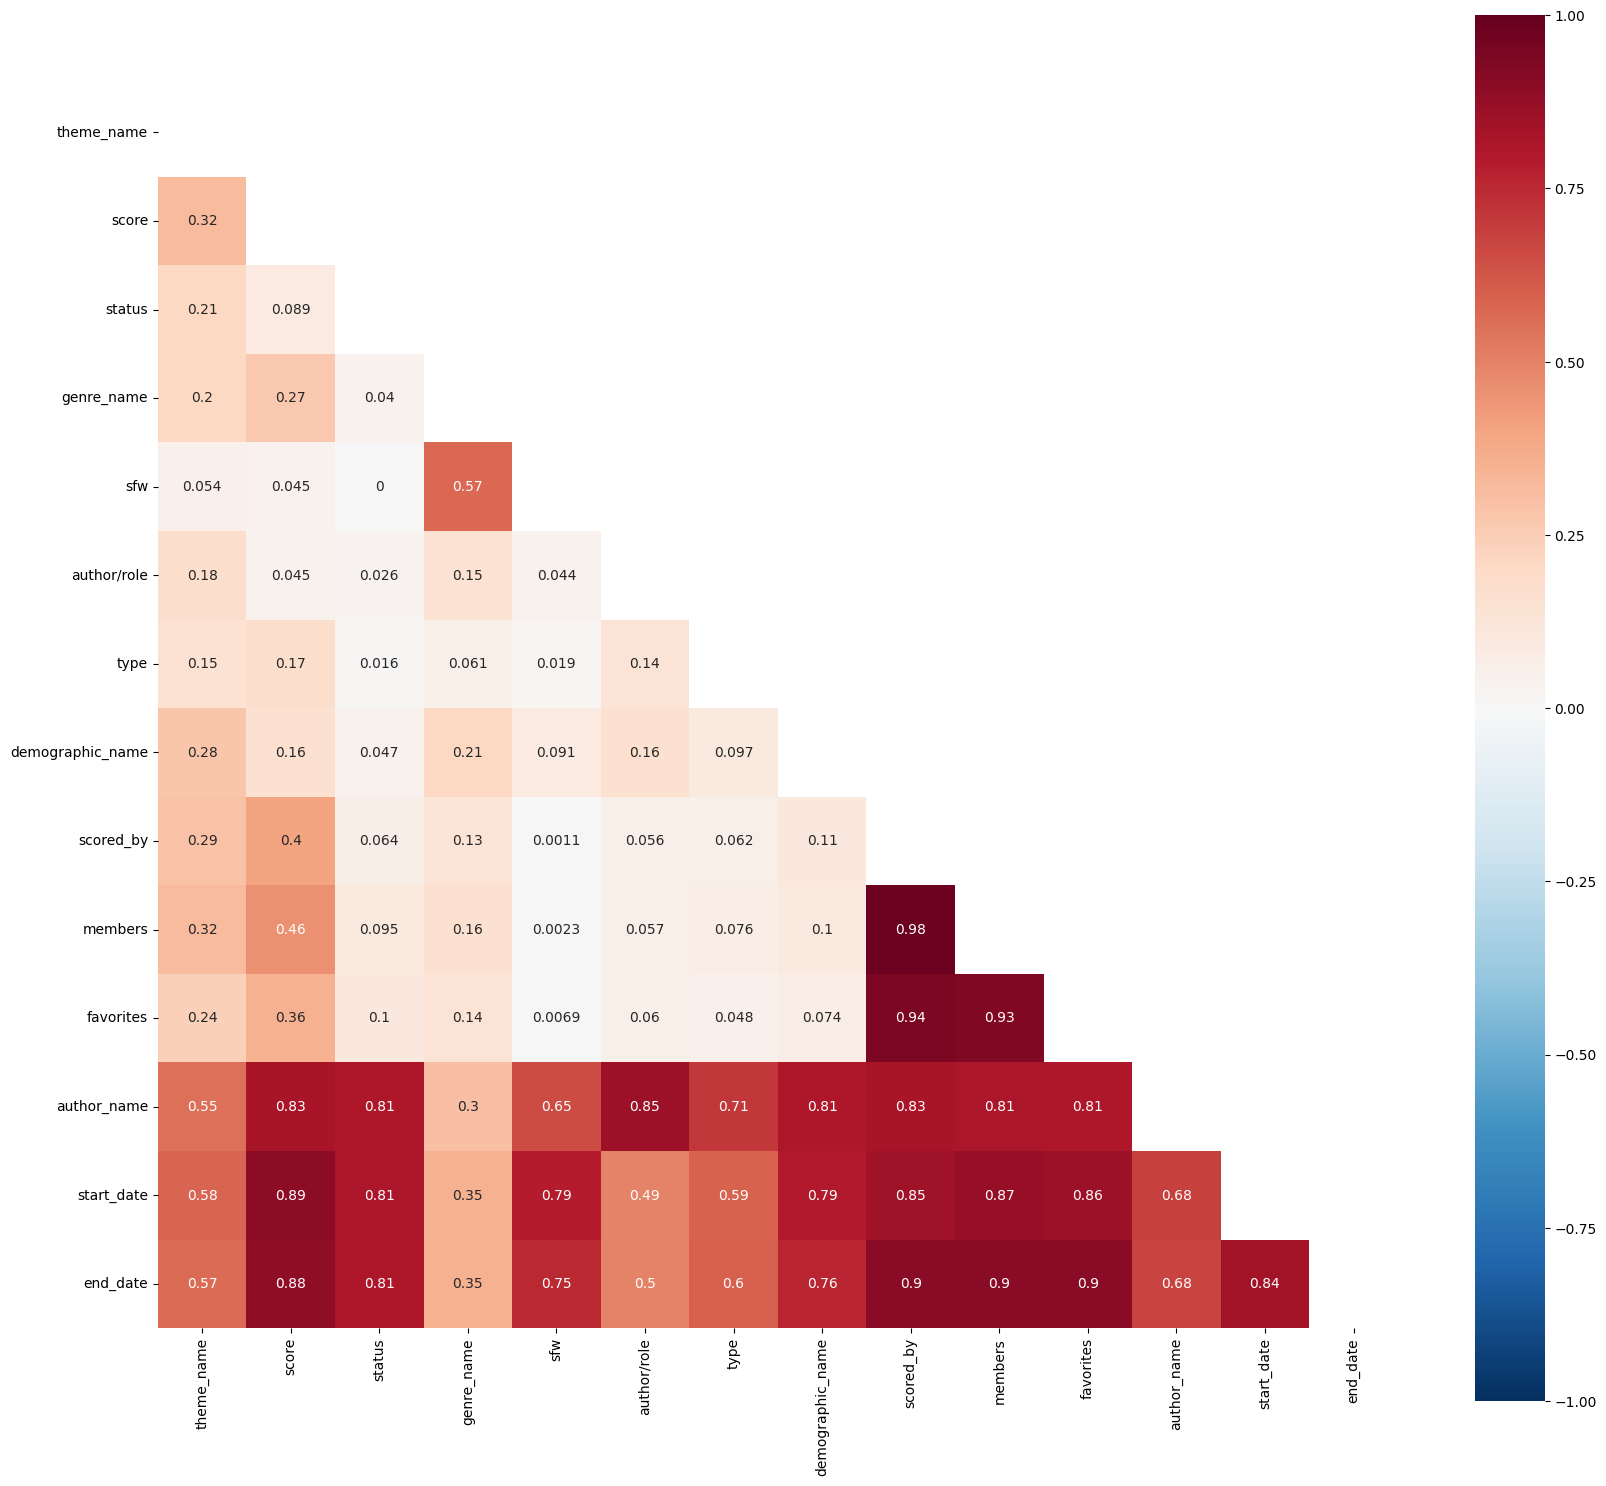

In [76]:
corr_matrix=res_corr['corr']
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, mask=mask, square=True, center=0, cmap='RdBu_r', annot=True, vmin=-1.0, vmax=1.0)